In [1]:
import sys
sys.path.append("../")

from src.cmesrc.config import CMESRCV3_DB

import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect(CMESRCV3_DB)
cur = conn.cursor()

new_conn = sqlite3.connect('alex_database.db')
new_cur = new_conn.cursor()

# Attach alex_database to CMESRCV3_DB
cur.execute("ATTACH DATABASE 'alex_database.db' AS alex")

In [7]:
cur.execute("DROP TABLE IF EXISTS alex.associations")
cur.execute("""
            CREATE TABLE IF NOT EXISTS alex.associations AS
            SELECT FCHA.cme_id, C.cme_date, C.cme_pa, C.cme_width, FCHA.harpnum, PHB.LONDTMIN, PHB.LONDTMAX, PHB.LATDTMIN, PHB.LATDTMAX, CHE.flare_id, F.flare_class, F.flare_date, CHE.dimming_id, D.dimming_start_date, D.dimming_peak_date, FCHA.verification_score FROM FINAL_CME_HARP_ASSOCIATIONS FCHA
            INNER JOIN CMEs C ON C.cme_id = FCHA.cme_id
            INNER JOIN PROCESSED_HARPS_BBOX PHB ON
            PHB.harpnum = FCHA.harpnum AND PHB.timestamp = C.image_timestamp
            INNER JOIN CMES_HARPS_EVENTS CHE ON CHE.cme_id = FCHA.cme_id AND CHE.harpnum = FCHA.harpnum
            LEFT JOIN FLARES F ON F.flare_id = CHE.flare_id
            LEFT JOIN DIMMINGS D ON D.dimming_id = CHE.dimming_id
""")

In [8]:
df = pd.read_sql("SELECT * FROM alex.associations", conn)
df

,cme_id,cme_date,cme_pa,cme_width,harpnum,LONDTMIN,LONDTMAX,LATDTMIN,LATDTMAX,flare_id,flare_class,flare_date,dimming_id,dimming_start_date,dimming_peak_date,verification_score
0,20100501071205111,2010-05-01 07:12:05,111.0,108.0,2,-30.341700,-18.694700,9.947700,18.497101,1.0,B1.6,2010-05-01 05:24:00,NaN,None,None,4.0
1,20100507080605317,2010-05-07 08:06:05,317.0,23.0,8,47.799900,67.076500,37.777802,43.764599,32.0,C2.0,2010-05-07 07:36:00,NaN,None,None,4.0
2,20100508053006310,2010-05-08 05:30:06,310.0,33.0,8,59.099701,78.376297,37.777802,43.764599,37.0,C9.3,2010-05-08 04:48:00,NaN,None,None,2.0
3,20100523180605999,2010-05-23 18:06:05,NaN,360.0,24,1.929400,16.586500,12.851200,19.236099,NaN,None,None,4321.0,2010-05-23 16:46:02,2010-05-23 16:46:02,5.0
4,20100524140605999,2010-05-24 14:06:05,NaN,360.0,25,23.658001,32.392502,18.135799,22.745199,NaN,None,None,4322.0,2010-05-24 13:22:02,2010-05-24 13:24:02,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,20180122031208275,2018-01-22 03:12:08,275.0,116.0,7229,53.277699,61.628101,-15.687700,-9.132600,14074.0,B9.5,2018-01-22 02:48:00,NaN,None,None,4.0
1128,20180212012518999,2018-02-12 01:25:18,NaN,360.0,7237,5.349400,24.402599,-11.373500,-3.478100,NaN,None,None,9053.0,2018-02-12 00:23:59,2018-02-12 00:35:59,5.0
1129,20180302012540271,2018-03-02 01:25:40,271.0,55.0,7240,50.358101,59.028099,3.243600,8.347900,14172.0,B6.8,2018-03-02 00:48:00,9054.0,2018-03-02 00:35:59,2018-03-02 00:37:59,3.0
1130,20180331094805097,2018-03-31 09:48:05,97.0,64.0,7246,-64.406403,-52.142101,-11.754200,-5.830100,14187.0,B7.1,2018-03-31 09:00:00,NaN,None,None,4.0


In [ ]:
conn.commit()
conn.close()

new_conn.commit()
new_conn.close()

In [ ]:
df.to_csv('alex_database.csv', index=False)

In [19]:
from src.cmesrc.config import DIMMINGS_MATCHED_TO_HARPS_PICKLE, CMESRCV3_DB
from src.cmesrc.utils import read_sql_processed_bbox, get_closest_harps_timestamp

conn = sqlite3.connect(CMESRCV3_DB)

In [20]:
df = pd.read_pickle(DIMMINGS_MATCHED_TO_HARPS_PICKLE)

In [21]:
data = df[df["dimming_id"] == 6519]

In [38]:
data

,dimming_id,start_time,end_time,last_detection_time,half_value_time,max_detection_time,sequences,max_detection_ratio,f_r,avg_x,...,HARPNUM,DIMMING_HARPNUM_ID,HARPS_RAW_LONDTMIN,HARPS_RAW_LATDTMIN,HARPS_RAW_LONDTMAX,HARPS_RAW_LATDTMAX,HARPS_RAW_DATE,HARPS_DIMMING_DISTANCE,POSITION_SCORES,MATCH
11641,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2553,ID65192553,88.894098,-25.924000,90.000000,-22.897600,2013-03-11 21:00:00.000,0.087404,49.890863,True
11631,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2511,ID65192511,45.611401,-23.237301,85.095100,-9.738300,2013-03-11 21:00:00.000,0.141481,16.171497,False
11632,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2520,ID65192520,10.883300,1.975500,53.623100,21.857800,2013-03-11 21:00:00.000,0.810414,0.000000,False
11633,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2522,ID65192522,10.425500,-24.834900,33.008900,-15.064400,2013-03-11 21:00:00.000,0.848499,0.000000,False
11634,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2530,ID65192530,16.219200,-30.126101,30.005100,-25.522400,2013-03-11 21:00:00.000,0.863540,0.000000,False
11635,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2533,ID65192533,-16.716400,20.757799,-0.827500,28.128901,2013-03-11 21:00:00.000,1.738734,0.000000,False
11636,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2541,ID65192541,-13.990200,7.864100,5.745200,15.820500,2013-03-11 21:00:00.000,1.528171,0.000000,False
11637,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2543,ID65192543,-21.158001,-23.433399,2.690400,-14.845700,2013-03-11 21:00:00.000,1.300600,0.000000,False
11638,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2546,ID65192546,-69.304100,3.787600,-42.639099,22.823900,2013-03-11 21:00:00.000,2.205519,0.000000,False
11639,6519,2013-03-11 20:58:01.0,2013-03-11 21:28:01.0,2013-03-11 21:04:01.0,2013-03-11 20:58:01.0,2013-03-11 21:04:01.000,23,1.159499,1.00487,0.863465,...,2547,ID65192547,-1.217900,-20.104700,6.887800,-16.362600,2013-03-11 21:00:00.000,1.266806,0.000000,False


In [29]:
from astropy.time import Time as Time

dimming_loc = data.iloc[0][["longitude", "latitude"]]

dtime = Time(data.iloc[0]["max_detection_time"], format="iso")

harpnums = data["HARPNUM"].unique()

bboxes = []

for harpnum in harpnums:
    all_bboxes = read_sql_processed_bbox(harpnum, conn)
    timestamps = all_bboxes["timestamp"]
    timestamp = get_closest_harps_timestamp(timestamps, dtime)

    bbox = all_bboxes[all_bboxes["timestamp"] == timestamp][["LONDTMIN", "LONDTMAX", "LATDTMIN", "LATDTMAX"]]

    bboxes.append([[bbox["LONDTMIN"].values[0], bbox["LATDTMIN"].values[0]], [bbox["LONDTMAX"].values[0], bbox["LATDTMAX"].values[0]]])

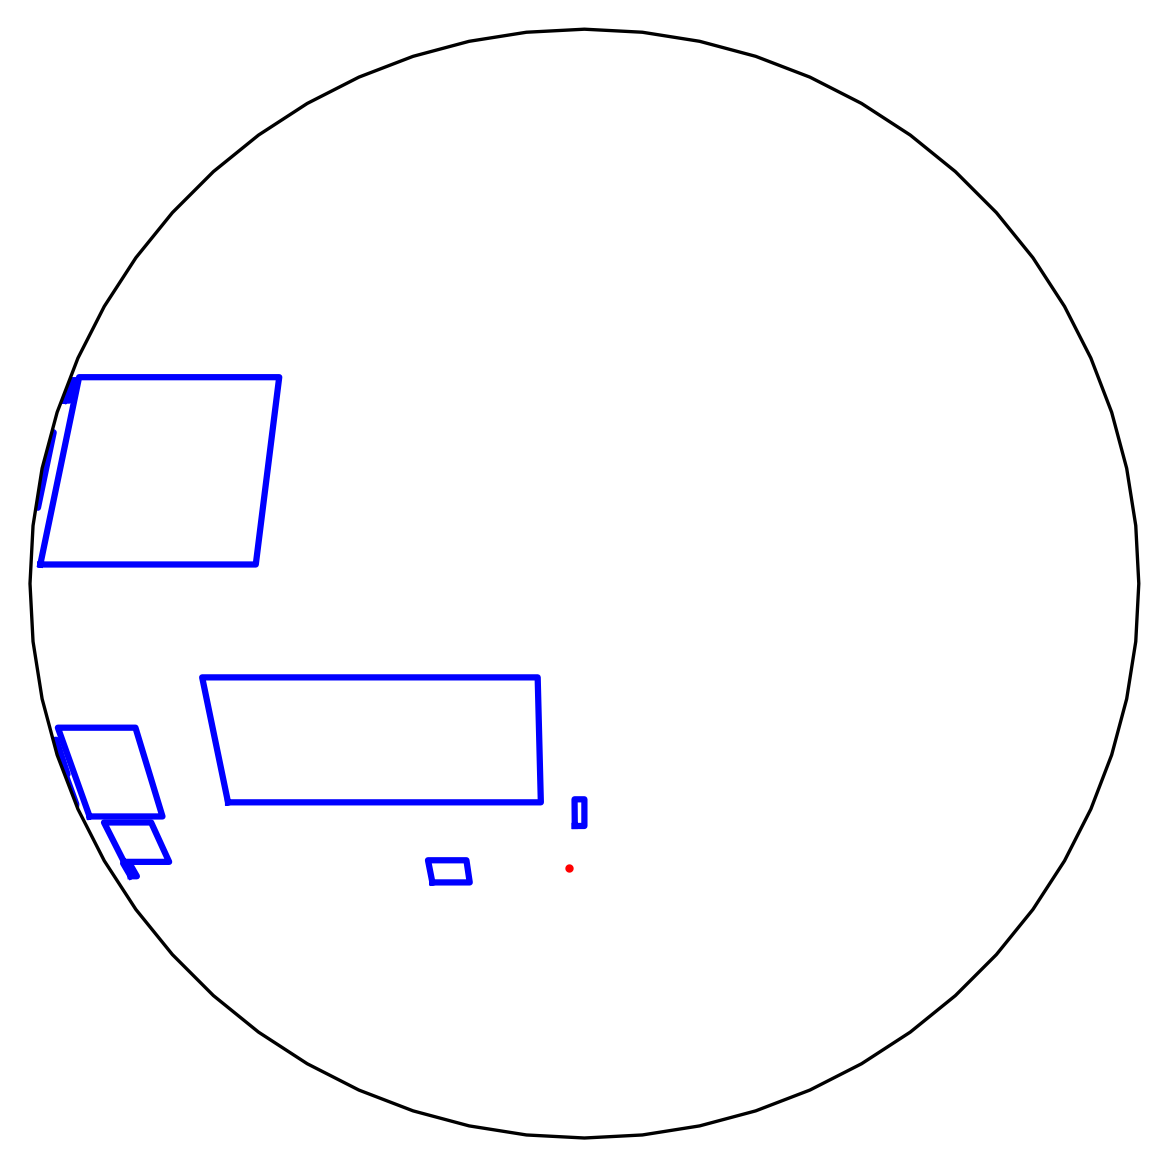

In [37]:
# Bboxes and dimming location are in heliographic stonyhurst coordinates, plot 

# Use this as template

# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

# i = 1
# projection = ccrs.Orthographic(central_longitude=0, central_latitude=0)

# fig, ax = plt.subplots(subplot_kw={'projection': projection})

# bbox = check_df[["LONDTMIN", "LONDTMAX", "LATDTMIN", "LATDTMAX"]].values[1]

# point_lon, point_lat = check_df[["sr_lon", "sr_lat"]].values[1]

# ax.plot([bbox[0], bbox[1], bbox[1], bbox[0], bbox[0]],
        # [bbox[2], bbox[2], bbox[3], bbox[3], bbox[2]],
        # transform=ccrs.Geodetic(),
        # color='blue')

# ax.scatter(point_lon, point_lat, transform=ccrs.Geodetic(), color='red')
# ax.set_global()

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

i = 1
projection = ccrs.Orthographic(central_longitude=90, central_latitude=0)

fig, ax = plt.subplots(subplot_kw={'projection': projection}, dpi=300)

for bbox in bboxes:
    ax.plot([bbox[0][0], bbox[1][0], bbox[1][0], bbox[0][0], bbox[0][0]],
            [bbox[0][1], bbox[0][1], bbox[1][1], bbox[1][1], bbox[0][1]],
            transform=ccrs.Geodetic(),
            color='blue')
    
ax.scatter(dimming_loc[0], dimming_loc[1], transform=ccrs.Geodetic(), color='red', s=1)
ax.set_global()

plt.show()